<a href="https://colab.research.google.com/github/Mohini1733/ML-MINOR-APRIL/blob/main/MINOR_XGBCLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipython-autotime
%load_ext autotime


time: 2.04 ms (started: 2021-05-24 07:39:13 +00:00)


array([[[ 83,  77,  77],
        [ 75,  69,  69],
        [ 89,  85,  84],
        ...,
        [ 92, 112, 100],
        [ 95, 115, 103],
        [100, 120, 108]],

       [[ 99,  93,  93],
        [ 90,  84,  84],
        [ 93,  89,  88],
        ...,
        [ 97, 117, 105],
        [ 98, 118, 106],
        [100, 120, 108]],

       [[ 77,  72,  69],
        [ 78,  72,  72],
        [ 70,  66,  65],
        ...,
        [ 92, 110,  96],
        [ 92, 110,  96],
        [ 91, 109,  95]],

       ...,

       [[ 78,  96,  44],
        [118, 137,  82],
        [ 82, 101,  46],
        ...,
        [ 53,  54,  36],
        [ 51,  52,  34],
        [ 49,  50,  32]],

       [[ 81, 125,  46],
        [ 68, 109,  31],
        [ 98, 132,  58],
        ...,
        [ 48,  46,  23],
        [ 64,  64,  38],
        [ 77,  77,  51]],

       [[ 80, 124,  45],
        [ 67, 108,  30],
        [ 98, 132,  58],
        ...,
        [ 60,  58,  35],
        [ 75,  75,  49],
        [ 88,  88,  62]]

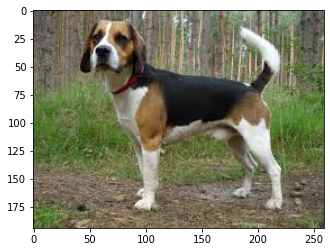

time: 1.73 s (started: 2021-05-24 07:39:13 +00:00)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

path = '/content/drive/MyDrive/smartknower/Dog/10.jpg'
img = plt.imread(path)
plt.imshow(img)
img

In [3]:
import os
import numpy as np
target = []
images = []
flat_data = []
DATADIR = '/content/drive/MyDrive/smartknower'
CATEGORIES = ['Dog','birds']

for category in CATEGORIES:
  print (category)
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  print(path)

  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

Dog
/content/drive/MyDrive/smartknower/Dog
birds
/content/drive/MyDrive/smartknower/birds
time: 6.34 s (started: 2021-05-24 07:39:21 +00:00)


In [4]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 5.62 ms (started: 2021-05-24 07:39:27 +00:00)


In [5]:
flat_data[0]

array([1., 1., 1., ..., 1., 1., 1.])

time: 4.42 ms (started: 2021-05-24 07:39:29 +00:00)


<BarContainer object of 2 artists>

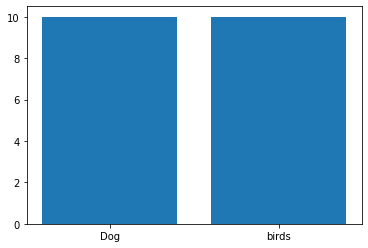

time: 142 ms (started: 2021-05-24 07:39:31 +00:00)


In [6]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3, random_state = 109)

time: 168 ms (started: 2021-05-24 07:39:34 +00:00)


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

time: 22.7 ms (started: 2021-05-24 07:39:36 +00:00)


In [9]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred
accuracy_score(y_pred,y_test)

1.0

time: 3.54 s (started: 2021-05-24 07:39:38 +00:00)


Enter URL/content/drive/MyDrive/smartknower/testdog.jpg
(225, 225, 3)
PREDICED OUTPUT: Dog


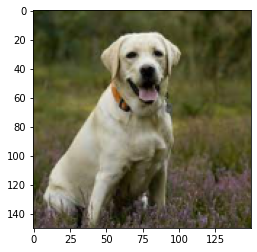

time: 18.8 s (started: 2021-05-24 07:39:43 +00:00)


In [10]:
flat_data = []
url = input('Enter URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICED OUTPUT: {y_out}')